# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [263]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection (standalone machine can use mlxtend)
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import LeaveOneOut

# 2. Collect and load data

In [506]:
df=pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [399]:
df['x'].value_counts().sum()

49

In [507]:
#droping the column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['u', 'x'], dtype='object')

In [319]:
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [309]:
#check the shape
df.shape

(49, 2)

In [202]:
#check the dtypes whether it is given correctly
#in this dataframe it is properly given
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   u       49 non-null     int64
 1   x       49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


# 3. Explore numeric variables - five number summary

In [268]:
#Five number summary of the data using describe
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

# 3a

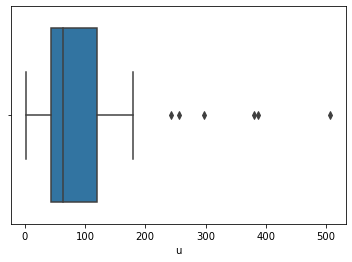

In [269]:
sns.boxplot(df['u'])
plt.show()

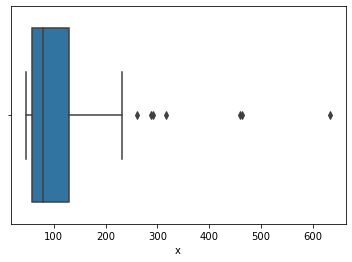

In [270]:
sns.boxplot(df['x'])
plt.show()

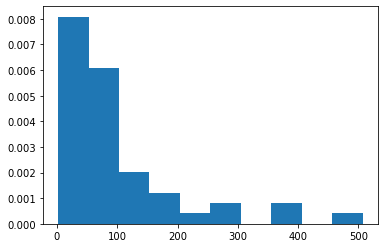

In [271]:
plt.hist(df['u'],density=True)
plt.show()

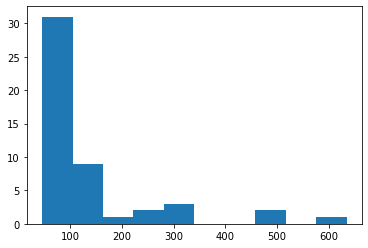

In [272]:
plt.hist(df['x'])
plt.show()

# 3b

In [273]:
#Variance will tell the spread of the data
df.var()

u   10900.416667
x   15158.832483
dtype: float64

In [274]:
df.std()

u   104.405061
x   123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

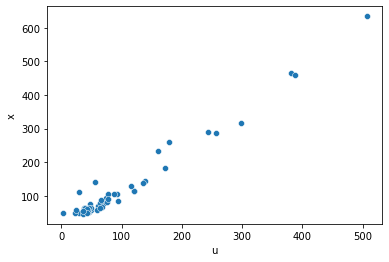

In [413]:
sns.scatterplot(df['u'],df['x'])
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [487]:
df['u'].skew()#Highly skewed

2.255275603839222

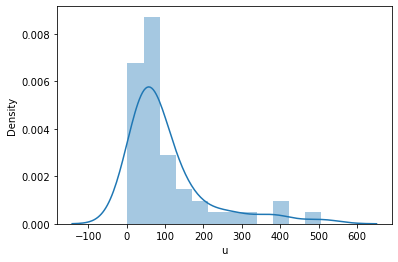

In [488]:
sns.distplot(df['u'])
plt.show()#Right Positively high skewness

In [489]:
df['u'],RS_lambda=stats.boxcox(df['u'])

<AxesSubplot:xlabel='u', ylabel='Density'>

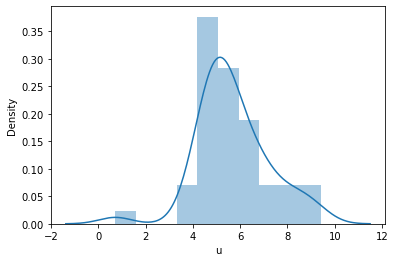

In [490]:
sns.distplot(df['u'])

In [491]:
df['u'].skew()

0.07071767083540643

In [492]:
df['x'].skew()#Highly skewed

2.4929020374730873

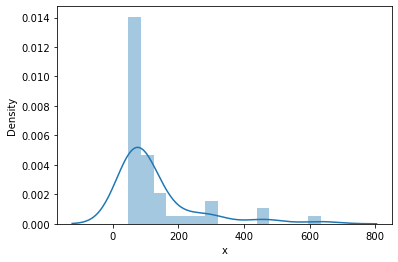

In [493]:
sns.distplot(df['x'])
plt.show()#Right Positively high skewness

In [494]:
df['x'],RS_lambda=stats.boxcox(df['x'])

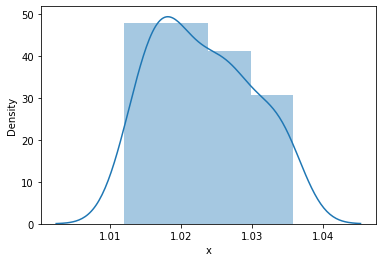

In [495]:
sns.distplot(df['x'])
plt.show()

In [461]:
df['x'].skew()

0.2869376968886859

In [ ]:
Before using boxcox transformation,the skewness of the variable u was highly skewed:2.49
After using boxcox transformation,the skewness of the variable u was moderate skewness=0.2 which is tolerable skewness.

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [214]:
#check whether there is any missing values or not
df.isnull().sum()
#there is no null values to impute

u    0
x    0
dtype: int64

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

In [215]:
df.corr()

,u,x
u,1.000000,0.867608
x,0.867608,1.000000


# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [508]:
x=df.drop('u',axis=1)#independent variable
y=df[['u']]#target variable

In [509]:
x=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

m1=sm.OLS(ytrain,xtrain).fit()

In [510]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      u   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.58e-29
Time:                        22:06:18   Log-Likelihood:                -171.54
No. Observations:                  39   AIC:                             347.1
Df Residuals:                      37   BIC:                             350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8191      4.574     -1.054      0.299     -14.086       4.448
x              0.8351      0.025     33.573      0.000       0.785       0.885
==============================================================================
Omnibus:                       12.996   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.013
Skew:                          -1.115   Prob(JB):                     0.000906
Kurtosis:                       4.911   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [511]:
x=df[['x']]
x_scaler=StandardScaler()
X_std = x_scaler.fit_transform(x)

In [512]:
linreg = LinearRegression()
# build the model using train data
# use fit() to fit the regression model
MLR_model = linreg.fit(X_std, y)
lin_pred = MLR_model.predict(X_std)

In [513]:
MLR_model.coef_,MLR_model.intercept_

(array([[101.44753002]]), array([103.14285714]))

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

Text(0, 0.5, 'Residuals')

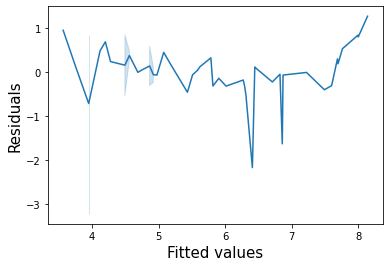

In [502]:
X=df[['x']]

# 'sm.add_constant' adds the intercept to the model
X_intercept = sm.add_constant(X)

# set the dependent variable
y = df['u']

# building a model with an intercept
# fit() is used to fit the OLS model
m2 = sm.OLS(y,X_intercept).fit()

# obtain the residuals
residuals = m2.resid

# obtain the fitted values
fitted_values = m2.fittedvalues

# set the plot size


# plot a scatter plot
sns.lineplot(fitted_values, residuals)

# set the x-axis label using xlabel()
# fontsize: specifies the fontsize
plt.xlabel("Fitted values", fontsize = 15)

# set the y-axis label using xlabel()
# fontsize: specifies the fontsize
plt.ylabel("Residuals",fontsize = 15)

# display the plot

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [514]:
x=df[['x']]
LR=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [515]:
MLR_model=LR.fit(xtrain,ytrain)
y_pred_train=LR.predict(xtrain)
y_pred_test=LR.predict(xtest)
mse_train=mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse_train)
print(rmse_train,mse_test)

19.679959408619755 0.0565203954658189


In [516]:
mse_test=mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse_test)
print(rmse_test,mse_test)

19.767179067674828 390.7413682935218


In [340]:
df.shape

(49, 2)

In [485]:
rsquared=MLR_model.score(xtrain,ytrain)
print(rsquared)
adj_rsquared=1-((1-rsquared)*(48)/(49-2-1))
print(adj_rsquared)

0.6773687563901463
0.6633413110158048


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [486]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)#CAN SHUFFLE AND CAN CONSIDER IN RANDOM
rmse=cross_val_score(LR,X,y,cv=kf,scoring='neg_root_mean_squared_error')
LR_be=np.mean(np.abs(rmse))
LR_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_error',LR_be)
print('VAR_error',LR_ve)

Bias_error 0.6588065634912783
VAR_error 0.4428520063479559


In [ ]:
High bias and low variance due to less independent variable so this is underfit model.